In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

season_stats = pd.read_csv('Seasons_Stats.csv')

""" Structuring a DataFrame of aspects that imply a team plays a """

# team_playing_stats = season_stats.loc['Year', 'Tm', 'MP', 'PER', 'AST', 'AST%', 'USG%', 'PTS', '3PA', '2PA', 'PF']
""" build normalized series for each interesting column """
players_df = season_stats[['Tm', 'Year', 'AST', 'MP', 'PTS', '3PA', '2PA', 'PER', 'G']].dropna()
TOT_mask = players_df.Tm == 'TOT'           # the sum of stats for a player that played for more than 1 team
players_df = players_df[~TOT_mask]
players_df['TbY'] = players_df.Year.astype(int).apply(lambda name: str(name)) + ' ' + players_df.Tm
print(players_df)

        Tm    Year    AST      MP     PTS   3PA     2PA   PER     G       TbY
5727   LAL  1980.0  371.0  3143.0  2034.0   1.0  1382.0  25.3  82.0  1980 LAL
5728   GSW  1980.0   87.0  1222.0   362.0   1.0   317.0  11.0  67.0  1980 GSW
5729   PHO  1980.0  322.0  2168.0  1118.0   2.0   873.0  19.2  75.0  1980 PHO
5730   BOS  1980.0  671.0  2864.0  1131.0  18.0   776.0  15.3  80.0  1980 BOS
5731   CHI  1980.0   40.0   560.0    86.0   0.0    60.0   7.4  26.0  1980 CHI
...    ...     ...    ...     ...     ...   ...     ...   ...   ...       ...
24686  CHO  2017.0   99.0  1725.0   639.0   1.0   442.0  16.7  62.0  2017 CHO
24687  BOS  2017.0   42.0   525.0   178.0   1.0   157.0  13.0  51.0  2017 BOS
24688  ORL  2017.0    4.0   108.0    23.0   0.0    31.0   7.3  19.0  2017 ORL
24689  CHI  2017.0   36.0   843.0   240.0  99.0   122.0   6.9  44.0  2017 CHI
24690  LAL  2017.0   30.0   609.0   284.0   3.0   235.0  17.0  38.0  2017 LAL

[17286 rows x 10 columns]


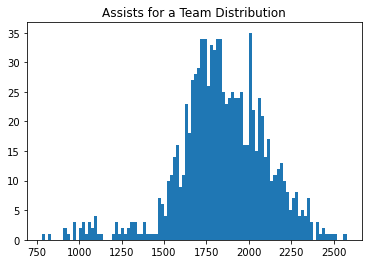

' try building a ML model to predict success - try to minimize error rate '

In [78]:
assists_by_team = players_df[['AST', 'TbY']].groupby(players_df.TbY).sum()
tby_mask = (players_df.groupby(players_df.TbY).count() > 13).Tm     # a team must have at least 14 players with data
plt.hist(assists_by_team[tby_mask], bins=100)
plt.title('Assists for a Team Distribution')
plt.show()
# print(players_df)
# maybe plot a histogram of assists_by_team
# print(assists_by_team[tby_mask].sort_values('AST'))


"""
build team_playing_by_team DF with normalized series for each interesting column by team - X matrix:
    AST -   sum
    MP  -   distribution - nuschat motivation: 1 - normalized std
    PTS -   distribution
    PA  -   distribution
    PF  -   distribution
index - <season>_<team_name>
"""

""" maybe - check correlation between the columns in X """

""" build y series - team success for each season """

""" check correlation for each colum in X with y """

""" hypothesis testing """

""" try building a ML model to predict success - try to minimize error rate """




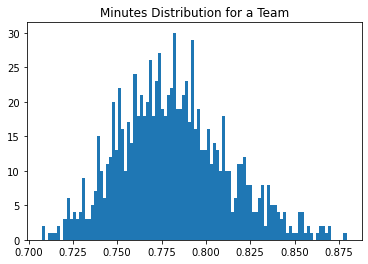

In [79]:
players_df['MpGnorm'] = players_df['MP'] / (players_df['G'] * 48)
norm_minutes_distribution = 1 - players_df[['MpGnorm', 'TbY']].groupby(players_df.TbY).std()
# The large the std => the division of minutes in the team is smaller.
plt.hist(norm_minutes_distribution[tby_mask], bins=100)
plt.title('Minutes Distribution for a Team')
plt.show()

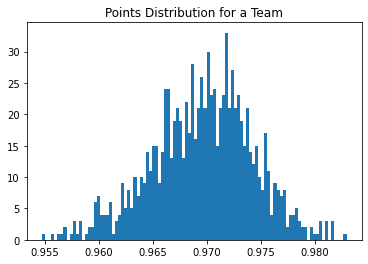

In [80]:
players_df['nPTS'] = players_df.PTS / players_df.G
points_distribution = players_df[['nPTS', 'TbY']].groupby(players_df.TbY).std()
norm_points_distribution = 1 - (points_distribution / np.linalg.norm(points_distribution))
# The large the std => the division of points in the team is smaller.
plt.hist(norm_points_distribution[tby_mask], bins=100)
plt.title('Points Distribution for a Team')
plt.show()

In [81]:
players_df['nPA'] = (3 * players_df['3PA'] + 2 * players_df['2PA']) / players_df.G
shots_distribution = players_df[['nPA', 'TbY']].groupby(players_df.TbY).std()
norm_shots_distribution = 1 - (shots_distribution / np.linalg.norm(shots_distribution))
# The large the std => the division of points in the team is smaller.
plt.hist(norm_shots_distribution[tby_mask], bins=100)
plt.title('Shots Distribution for a Team')
plt.show()

KeyboardInterrupt: 

In [ ]:
efficiency_distribution = players_df[['PER', 'TbY']].groupby(players_df.TbY).std()
norm_efficiency_distribution = 1 - (efficiency_distribution / np.linalg.norm(efficiency_distribution))
# The large the std => the division of efficiency in the team is smaller.
print(norm_minutes_distribution)
print(efficiency_distribution.sort_values(by='PER'))
plt.hist(norm_efficiency_distribution[tby_mask], bins=100)
plt.title('Efficiency Distribution for a Team')
plt.show()

In [88]:
relevant_teams_df = pd.DataFrame({ "nED" : norm_efficiency_distribution.PER,
                                   "nSD" : norm_shots_distribution.nPA,
                                   "nPD" : norm_points_distribution.nPTS,
                                   "nMD" : norm_minutes_distribution.MpGnorm,
                                   "AST" : assists_by_team.AST }, index=players_df.TbY)
print(relevant_teams_df)

               nED       nSD       nPD       nMD     AST
TbY                                                     
1980 LAL  0.970504  0.967234  0.962039  0.722585  2413.0
1980 GSW  0.975583  0.973035  0.971795  0.795519  2028.0
1980 PHO  0.978462  0.970360  0.965811  0.828410  2283.0
1980 BOS  0.984455  0.972553  0.972148  0.772804  2198.0
1980 CHI  0.981171  0.975989  0.972048  0.823408  2152.0
...            ...       ...       ...       ...     ...
2017 CHO  0.972623  0.967040  0.971782  0.799230  1891.0
2017 BOS  0.969429  0.962413  0.963763  0.776330  2069.0
2017 ORL  0.967511  0.968873  0.972348  0.786816  1820.0
2017 CHI  0.969662  0.973891  0.972189  0.826794  1851.0
2017 LAL  0.979675  0.973037  0.976607  0.849125  1716.0

[17286 rows x 5 columns]


In [115]:
team_names = pd.read_csv('Team_Names.csv')
team_records = pd.read_csv('Team_Records.csv')
team_names = team_names.set_index(team_names.Short).drop(columns=['Short'])
print(team_records.Team.unique())
print(season_stats.Tm.unique())
pd.Series(relevant_teams_df.index).apply(lambda team: print(team_names.loc(team[5:])))

['Boston Celtics' 'Boston Celtics*' 'Toronto Raptors' 'Toronto Raptors*'
 'New York Knicks' 'New York Knicks*' 'Philadelphia 76ers'
 'Philadelphia 76ers*' 'Syracuse Nationals*' 'Brooklyn Nets'
 'Brooklyn Nets*' 'New Jersey Nets' 'New Jersey Nets*' 'New York Nets'
 'New York Nets*' 'New Jersey Americans' 'Minnesota Timberwolves'
 'Minnesota Timberwolves*' 'Oklahoma City Thunder'
 'Oklahoma City Thunder*' 'Seattle SuperSonics' 'Seattle SuperSonics*'
 'Denver Nuggets' 'Denver Nuggets*' 'Denver Rockets*'
 'Portland Trail Blazers' 'Portland Trail Blazers*' 'Utah Jazz'
 'Utah Jazz*' 'New Orleans Jazz' 'Cleveland Cavaliers'
 'Cleveland Cavaliers*' 'Detroit Pistons' 'Detroit Pistons*'
 'Fort Wayne Pistons*' 'Fort Wayne Pistons' 'Milwaukee Bucks'
 'Milwaukee Bucks*' 'Indiana Pacers' 'Indiana Pacers*' 'Chicago Bulls'
 'Chicago Bulls*' 'Golden State Warriors' 'Golden State Warriors*'
 'San Francisco Warriors*' 'San Francisco Warriors'
 'Philadelphia Warriors*' 'Philadelphia Warriors' 'Los Angeles

ValueError: No axis named LAL for object type DataFrame